In [1]:
import os
os.chdir("..")

In [2]:
######
# plotTimePoint: plot y = f(x), where y is the difference between the time point when
# each event start to execute during replay and record, and x is the event index
#
#####
print(os.path.abspath(os.curdir))
import math
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from data_process.utils import *

/Users/yulunzhang/Desktop/Coding/Android/RERAN


# exp9 cytus exp

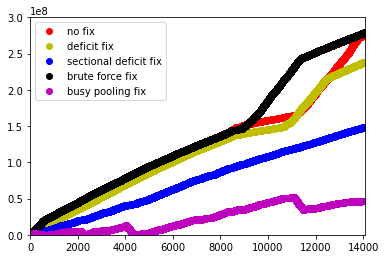

In [16]:
axis=[0, 14076, 0, 300*1e6]
plotRecordActualDiff(9, 1, color = 'ro', label = "no fix", axis=axis)
plotRecordActualDiff(9, 2, color = 'yo', label = "deficit fix", axis=axis)
plotRecordActualDiff(9, 3, color = 'bo', label = "sectional deficit fix", axis=axis)
plotRecordActualDiff(9, 4, color = 'ko', label = "brute force fix", axis=axis)
plotRecordActualDiff(9, 5, color = 'mo', label = "busy pooling fix", axis=axis)


plt.legend()
plt.show()

# score: 7% to 15%

Before fixing: 
Estimated coefficients:
 b_0_old = 6537429.875446498 
 b_1_old = 17739.417279785128
Pearson error: 0.9957236795871357

After fixing: 
Estimated coefficients:
 b_0_new = -482405.1682129055 
 b_1_new = 13791.220083313123
Pearson error: 0.9987492115653624


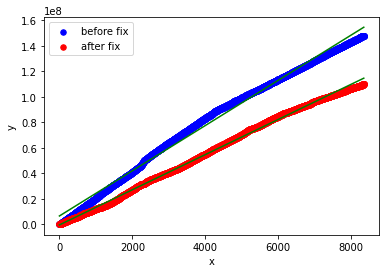

In [4]:
plotFixComWithLR(9, 1, 9, 2)

# Exp5

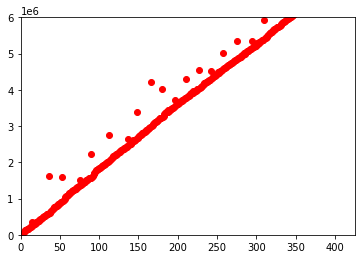

In [5]:
plotRecordActualDiff(5, 1)

# Exp7

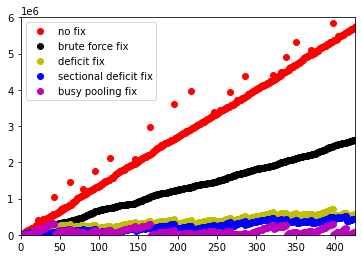

In [7]:
plotRecordActualDiff(7, 2, color = 'ro', label = "no fix")
plotRecordActualDiff(7, 1, color = 'ko', label = "brute force fix")
plotRecordActualDiff(7, 3, color = 'yo', label = "deficit fix")
# plotRecordActualDiff(7, 3, color = 'go', label = "deficit fix")
plotRecordActualDiff(7, 4, color = 'bo', label = "sectional deficit fix")
plotRecordActualDiff(7, 5, color = 'mo', label = "busy pooling fix")


plt.legend()
plt.show()

## Set2 - no fix

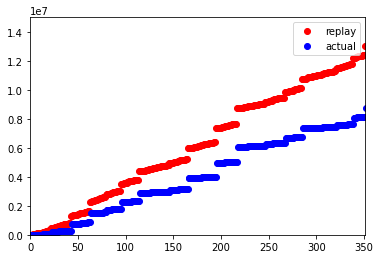

In [7]:
plotRecordActualCom(exp_num = 7, set_num = 2)

## Set1 - brute force fix

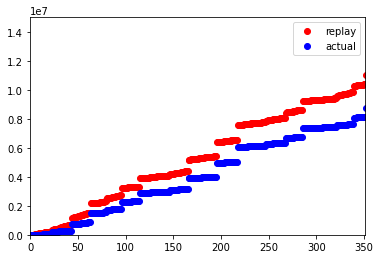

In [8]:
plotRecordActualCom(exp_num = 7, set_num = 1)

## Set3 - deficit fix

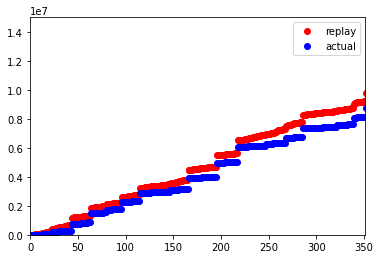

In [9]:
plotRecordActualCom(exp_num = 7, set_num = 3)

## Set4  - sectional deficit fix

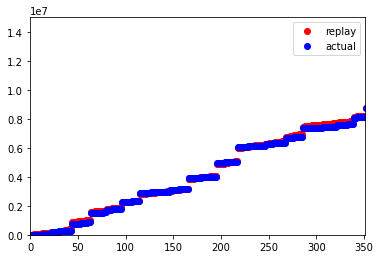

In [10]:
plotRecordActualCom(exp_num = 7, set_num = 4)

# Exp8

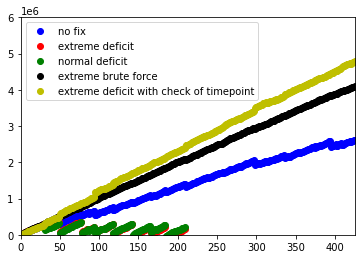

In [11]:
plotRecordActualDiff(8, 1, color = 'bo', label = "no fix")
plotRecordActualDiff(8, 2, color = 'ro', label = "extreme deficit")
plotRecordActualDiff(8, 3, color = 'go', label = "normal deficit")
plotRecordActualDiff(8, 4, color = 'ko', label = "extreme brute force")
plotRecordActualDiff(8, 5, color = 'yo', label = "extreme deficit with check of timepoint")
plt.legend()
plt.show()

# Pearson error test
Test how close the RecordActualDiff scattered plot is to a linear line

Before fixing: 
Estimated coefficients:
 b_0_old = 42453.58793361345 
 b_1_old = 6294.916826183715
Pearson error: 0.9977972572965633

After fixing: 
Estimated coefficients:
 b_0_new = 544111.1738336997 
 b_1_new = -4271.939835015564
Pearson error: -0.9309645778067642


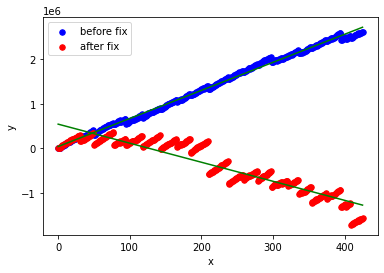

In [12]:
# def plotFixComWithLR(exp_num_before, set_num_before, exp_num_after, set_num_after):
#     replayTimePointsBlock = readReplayedTimePoint("exp%d/set%d/replayTimePointSet%d.txt" % (exp_num_before, set_num_before, set_num_before))
#     actualTimePoints = readActualTimePoint("exp%d/set%d/actualTimePointSet%d.txt" % (exp_num_before, set_num_before, set_num_before))
#     difference = takeDifference(replayTimePointsBlock[0], actualTimePoints)

#     replayTimePointsBlock = readReplayedTimePoint("exp%d/set%d/replayTimePointSet%d.txt" % (exp_num_after, set_num_after, set_num_after))
#     actualTimePoints = readActualTimePoint("exp%d/set%d/actualTimePointSet%d.txt" % (exp_num_after, set_num_after, set_num_after))
#     difference_exp = takeDifference(replayTimePointsBlock[0], actualTimePoints)

#     linear_regression_multi(difference, len(difference), difference_exp, len(difference_exp))
plotFixComWithLR(8, 1, 8, 2)

Before fixing: 
Estimated coefficients:
 b_0_old = 42453.58793361345 
 b_1_old = 6294.916826183715
Pearson error: 0.9977972572965633

After fixing: 
Estimated coefficients:
 b_0_new = 23489.957120315637 
 b_1_new = 11389.672458069545
Pearson error: 0.999489119302067


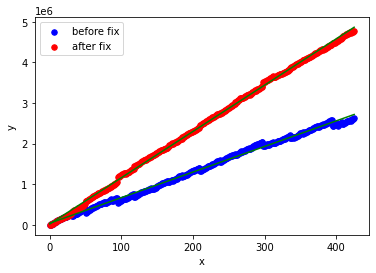

In [13]:
plotFixComWithLR(8, 1, 8, 5)

Before fixing: 
Estimated coefficients:
 b_0_old = 42453.58793361345 
 b_1_old = 6294.916826183715
Pearson error: 0.9977972572965633

After fixing: 
Estimated coefficients:
 b_0_new = 45143.00526767108 
 b_1_new = 9668.482498823221
Pearson error: 0.9998494529707573


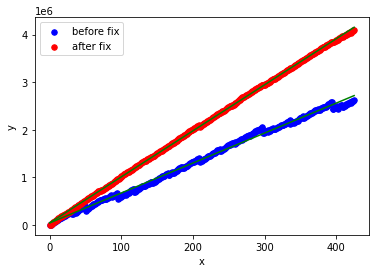

In [14]:
plotFixComWithLR(8, 1, 8, 4)